Q1
b] Multi-Layer-Perceptron

Q2
b] Feedforward Neural Network

Q3
b] To introduce non-linearity

Q4
d] All of the above

Q5
c] Accepts raw input data

Q6
d] Backpropagation

Q7
b] Connections between neurons

Q8
c] Providing final predictions

Q9
d] All of the above

Q10
d] Lack of generalization

Q11
b]  A computational unit performing weighted sums and activation

Q12
a] Randomly

Q13
c] By applying regularization (e.g., dropout, L2 norm)

Q14
b] To learn features from the input data

Q15
b] Outputs the same value as the input if it's positive; otherwise 0

Q16
b] Probabilities summing to 1

Q17
b] To adjust the step size for weight updates

Q18
b] It measures the difference between predicted and true outputs

Q19
b] Cross-Entropy Loss

Q20
a] MLP has multiple layers of neurons

In [1]:
#import necessory libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# 1. Load the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [3]:
# 2. Preprocess the data: Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Step 2: Define the MLP model architecture
model = models.Sequential()

# Flatten layer: Flatten the 28x28x1 images into a 1D vector of 784 values (28*28)
model.add(layers.Flatten(input_shape=(28, 28, 1)))

# First hidden layer: Dense layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation='tanh'))

# Second hidden layer: Dense layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation='tanh'))

# Output layer: Dense layer with 10 neurons (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# 4. Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9906 - loss: 0.0328 - val_accuracy: 0.9888 - val_loss: 0.0347
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9927 - loss: 0.0242 - val_accuracy: 0.9895 - val_loss: 0.0346
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9945 - loss: 0.0194 - val_accuracy: 0.9868 - val_loss: 0.0442
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9872 - val_loss: 0.0405
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss: 0.0111 - val_accuracy: 0.9811 - val_loss: 0.0580


In [9]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [13]:
# 6. Save the model to a file
model.save('mnist_model.h5')

In [14]:
# 7. Reload the model
loaded_model = tf.keras.models.load_model('mnist_model.h5')

In [15]:
# 8. Make predictions on the test set
predictions = loaded_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
import matplotlib.pyplot as plt
import numpy as np

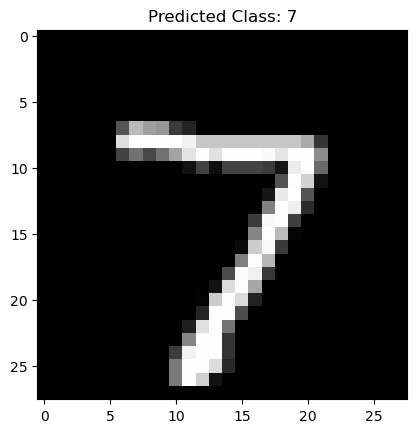

In [20]:
# 9. Display the input image and the predicted class
sample_index = 0  # Change this index to test with other images
plt.imshow(x_test[sample_index], cmap='gray')
plt.title(f"Predicted Class: {np.argmax(predictions[sample_index])}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


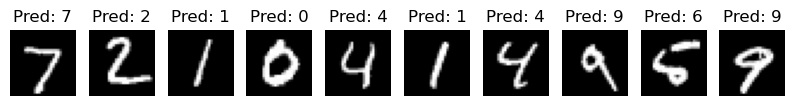

In [22]:
# To visualize a few predictions
num_images = 10
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Pred: {np.argmax(loaded_model.predict(x_test[i].reshape(1, 28, 28)))}')
    plt.axis('off')
plt.show()